<a href="https://colab.research.google.com/github/curiasuncc/4105-Intro-To-ML/blob/main/Hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv('/content/Housing.csv')
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df) 
M 

545

In [ ]:
X1 = df.values[:, 1]  # get input values from 2nd column,area 
X2 = df.values[:, 2]  # get input values from 3rd column,bedrooms 
X3 = df.values[:, 3]  # get input values from 4th column,bathrooms 
X4 = df.values[:, 4]  # get input values from 5th column,stories 
X5 = df.values[:, 10]  # get input values from 10th column,parking
X=X1+X2+X3+X4+X5
szz=X.getsizeof()
y = df.values[:, 0]  # get output values from 1st column.house price 
m = len(y) # Number of training examples 
print('X = ', X[: 5]) # Show only first 5 records 
print('y = ', y[: 5]) 
print('m = ', m) 

AttributeError: ignored

In [ ]:

#X = df.values[:, 0]  # get input values from first column 
#y = df.values[:, 1]  # get output values from second column 
#m = len(y) # Number of training examples 
#print('X = ', X[: 97]) # Show only first 5 records 
#print('y = ', y[: 97]) 
#print('m = ', m) 

Text(0.5, 1.0, 'Scatter plot of training data')

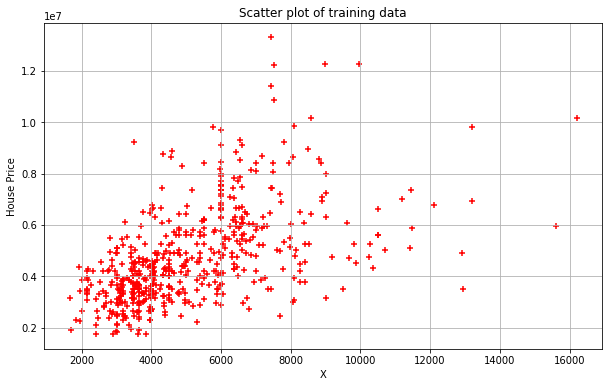

In [ ]:
plt.scatter(X,y, color='red',marker= '+') 
plt.grid() 
plt.rcParams["figure.figsize"] = (10,6) 
plt.xlabel('X') 
plt.ylabel('House Price') 
plt.title('Scatter plot of training data') 

In [ ]:
#Lets create a matrix with single column of ones 
X_0 = np.ones((m, 1)) 
X_0[:5] 

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Using reshape function convert X 1D array to 2D array of dimension mx1 
X_1 = X.reshape(m, 1) 
X_1[:10] 

array([[7431],
       [8975],
       [9969],
       [7511],
       [7429],
       [7509],
       [8593],
       [16210],
       [8109],
       [5760]], dtype=object)

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X = np.hstack((X_0, X_1)) 
X[:5] 

array([[1.0, 7431],
       [1.0, 8975],
       [1.0, 9969],
       [1.0, 7511],
       [1.0, 7429]], dtype=object)

In [ ]:
theta = np.zeros(2) 
theta 

array([0., 0.])

In [ ]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [ ]:

# Lets compute the cost for theta values 
cost = compute_cost(X, y, theta) 
print('The cost for given values of theta_0 and theta_1 =', cost) 

The cost for given values of theta_0 and theta_1 = 13106916364659.268


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
  """ 
  cost_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history 

In [ ]:
theta = [0., 0.] 
iterations = 1500; 
alpha = 0.05; 

In [ ]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


Final value of theta = [nan nan]
cost_history = [2.80127757e+25 6.86142123e+37 1.68062965e+50 ...            nan
            nan            nan]


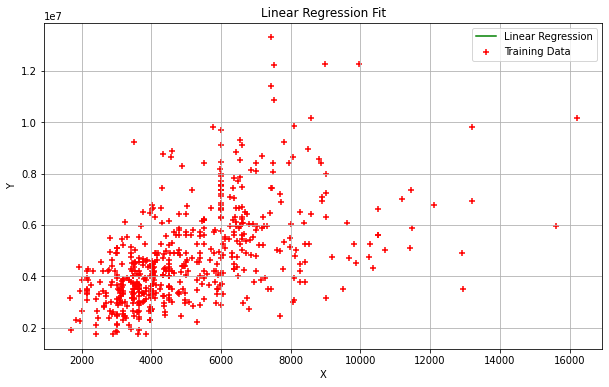

In [ ]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only 
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.title('Linear Regression Fit') 
plt.legend() 

Text(0.5, 1.0, 'Convergence of gradient descent')

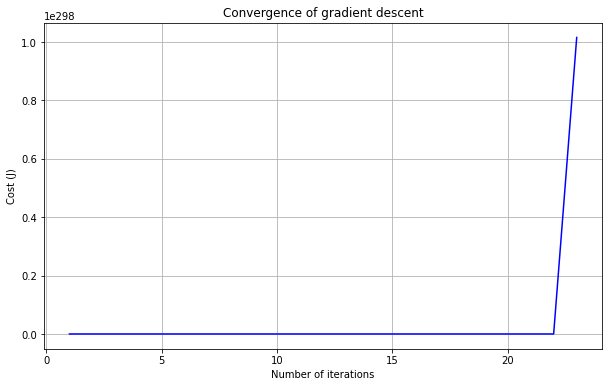

In [ ]:
plt.plot(range(1, iterations + 1),cost_history, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 